In [1]:
import warnings
from Utils.data_generators import *
from Utils.util_plotting import *
from Utils.util_data_preprocessing import *
package = 'prim'
warnings.filterwarnings('ignore')

/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/ema_workbench/em_framework/evaluators.py:59: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_d

experiment 1246/1250

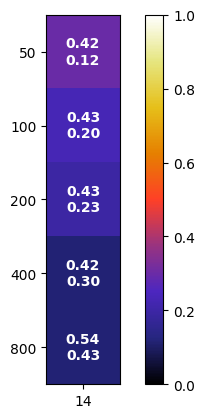

[[0.1247    ]
 [0.20221883]
 [0.23478714]
 [0.30122674]
 [0.42620177]]
[[0.42473014]
 [0.43365793]
 [0.43033035]
 [0.41835955]
 [0.54160083]]


In [2]:
create_heatmap_best_box_generated_data_precision_kfold_last_box(Bryant, 14, package, [add_data_with_smote_dtc], 50)

In [ ]:
create_heatmap_best_box_generated_data_precision_kfold_last_box(Higgs, 21, package, [add_data_with_smote_dtc], 50)

In [ ]:
create_heatmap_best_box_generated_data_precision_kfold_last_box(Susy, 18, package, [add_data_with_smote_dtc], 50)

In [ ]:
create_heatmap_best_box_generated_data_precision_kfold_last_box(Occupancy, 6, package, [add_data_with_smote_dtc], 50)

In [ ]:
create_heatmap_best_box_generated_data_precision_kfold_last_box(Shuttle, 8, package, None, 50)

In [ ]:
create_heatmap_best_box_generated_data_precision_kfold_last_box(Htru, 8, package, None, 50)